# Machine Learning In Action

## Summary

- Introduction to Machine Learning
- End-to-end ML project: predict housing prices

## Environment setup

In [30]:
import platform
import sklearn
import tensorflow as tf

print(f"Python version: {platform.python_version()}")
print(f'scikit-learn version: {sklearn.__version__}')
print(f"TensorFlow version: {tf.__version__}" )
print(f"Keras version: {tf.keras.__version__}")

Python version: 3.7.5
scikit-learn version: 0.22.1
TensorFlow version: 2.0.0
Keras version: 2.2.4-tf


## Introduction to Machine Learning

### A first definition

> "The field of study that gives computers the ability to learn without being explicitly programmed" (Arthur Samuel, 1959).

### Learning machines?

Machine Learning is a set of techniques for giving machines the ability to learn from data, in order to:

* Identify or classify elements
* Detect tendencies
* Make predictions

As more data is fed into the system, results get better: performance improves with experience.

### A new paradigm

![ML paradigm](images/ml_paradigm.png)


[![ML on XKCD](images/ml_xkcd.png)](https://xkcd.com/1838/)

![AI/ML/DL Venn diagram](images/ai_ml_dl.png)

### The ML landscape

ML systems are traditionally classified in three categories, according to the amount and type of human supervision during training. Hybrid approaches like [self-supervised learning](https://hackernoon.com/self-supervised-learning-gets-us-closer-to-autonomous-learning-be77e6c86b5a) exist.

- **Supervised Learning**: expected results (called *labels* or *tags*) are given to the system along with training data.
- **Unsupervised Learning**: training data comes without the expected results. The system must discover some structure in the data by itself.
- **Reinforcement Learning**: without being given an explicit goal, the system's decisions produce a **reward** it tries to maximize.

![ML category tree](images/ml_tree.png)

### Regression

The system predicts **continuous** values. Examples: temperature forecasting, asset price prediction...

![Regression example](images/ml_regression.png)

### Classification

The system predicts **discrete** values: input is **categorized**. Examples: cat/not a cat, spam/legit mail, begign/malignant tumor, handwritten digit recognition, tweet categorization.

![Classification example](images/ml_classification.png)

### Clustering

Data is partitioned into groups.

![ML clustering example](images/ml_clustering.png)

### Anomaly Detection

The system is able to detect abnomal samples (*outliers*).

![ML anomaly detection example](images/ml_anomaly_detection.png)

### Game AI

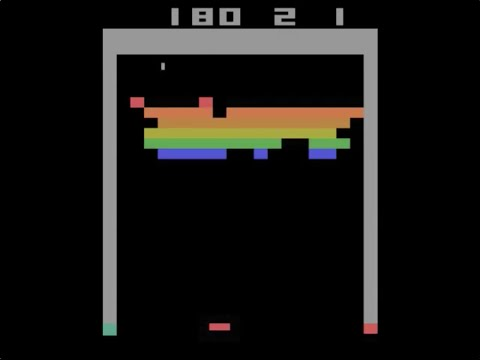

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('TmPfTpjtdgg')  

### Machine Learning models

The representation learnt from data during training is called a **model**. It defines the relationship between inputs and outputs. Most (but not all) ML systems are model-based.

[![Extract from the book Hands-on Machine Learning with Scikit-Learn & TensorFlow by A. Géron](images/instance_model_learning.png)](https://github.com/ageron/handson-ml2)

### The ML workflow

1. Frame the problem
2. Collect, analyze and prepare the data
3. Select and train models
4. Tune the chosen model
5. Deploy to production and maintain the system

## End-to-end ML project: predict housing prices

### Framing the problem

- What is the business objective?
- How good are the current solutions?
- What data is available?
- Is the problem a good fit for ML?
- What is the expected learning type (supervised or not, batch/online...)?
- How will the model's performance be evaluated?

### Properties of ML-friendly problems

- Difficulty to express the actions as rules.
- Data too complex for traditional analytical methods:
  - High number of features.
  - Highly correlated data (data with similar or closely related values).
- Performance > explicability.

### Example: predict house prices

- Inputs: house properties (lot size, number of bedrooms...)
- Output: house price

[![Kaggle houses banner](images/kaggle_housesbanner.png)](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview)

## Step 2: assembling data


### The importance of data

Data quality is **paramount** for any ML project.

![Your data, your model](images/yourdata_yourmodel.png)

### Predefined datasets Vs real data

Real data is messy, incomplete and often scattered across many sources.

Data labeling is a manual and tedious process.

Predefined datasets offer a convenient way to bypass the data wrangling step. Alas, using one is not always an option.

### Example: the California housing dataset

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
# Setup plots
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8
%config InlineBackend.figure_format = 'retina'
sns.set()

In [5]:
dataset_url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
df_housing = pd.read_csv(dataset_url)

# Print dataset shape (rows and columns)
print(f"Dataset shape: {df_housing.shape}")

Dataset shape: (20640, 10)


In [6]:
# Print a concise summary of the dataset
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
# Show the 10 first samples
df_housing.head(n=10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [8]:
# Print descriptive statistics for all numerical attributes
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


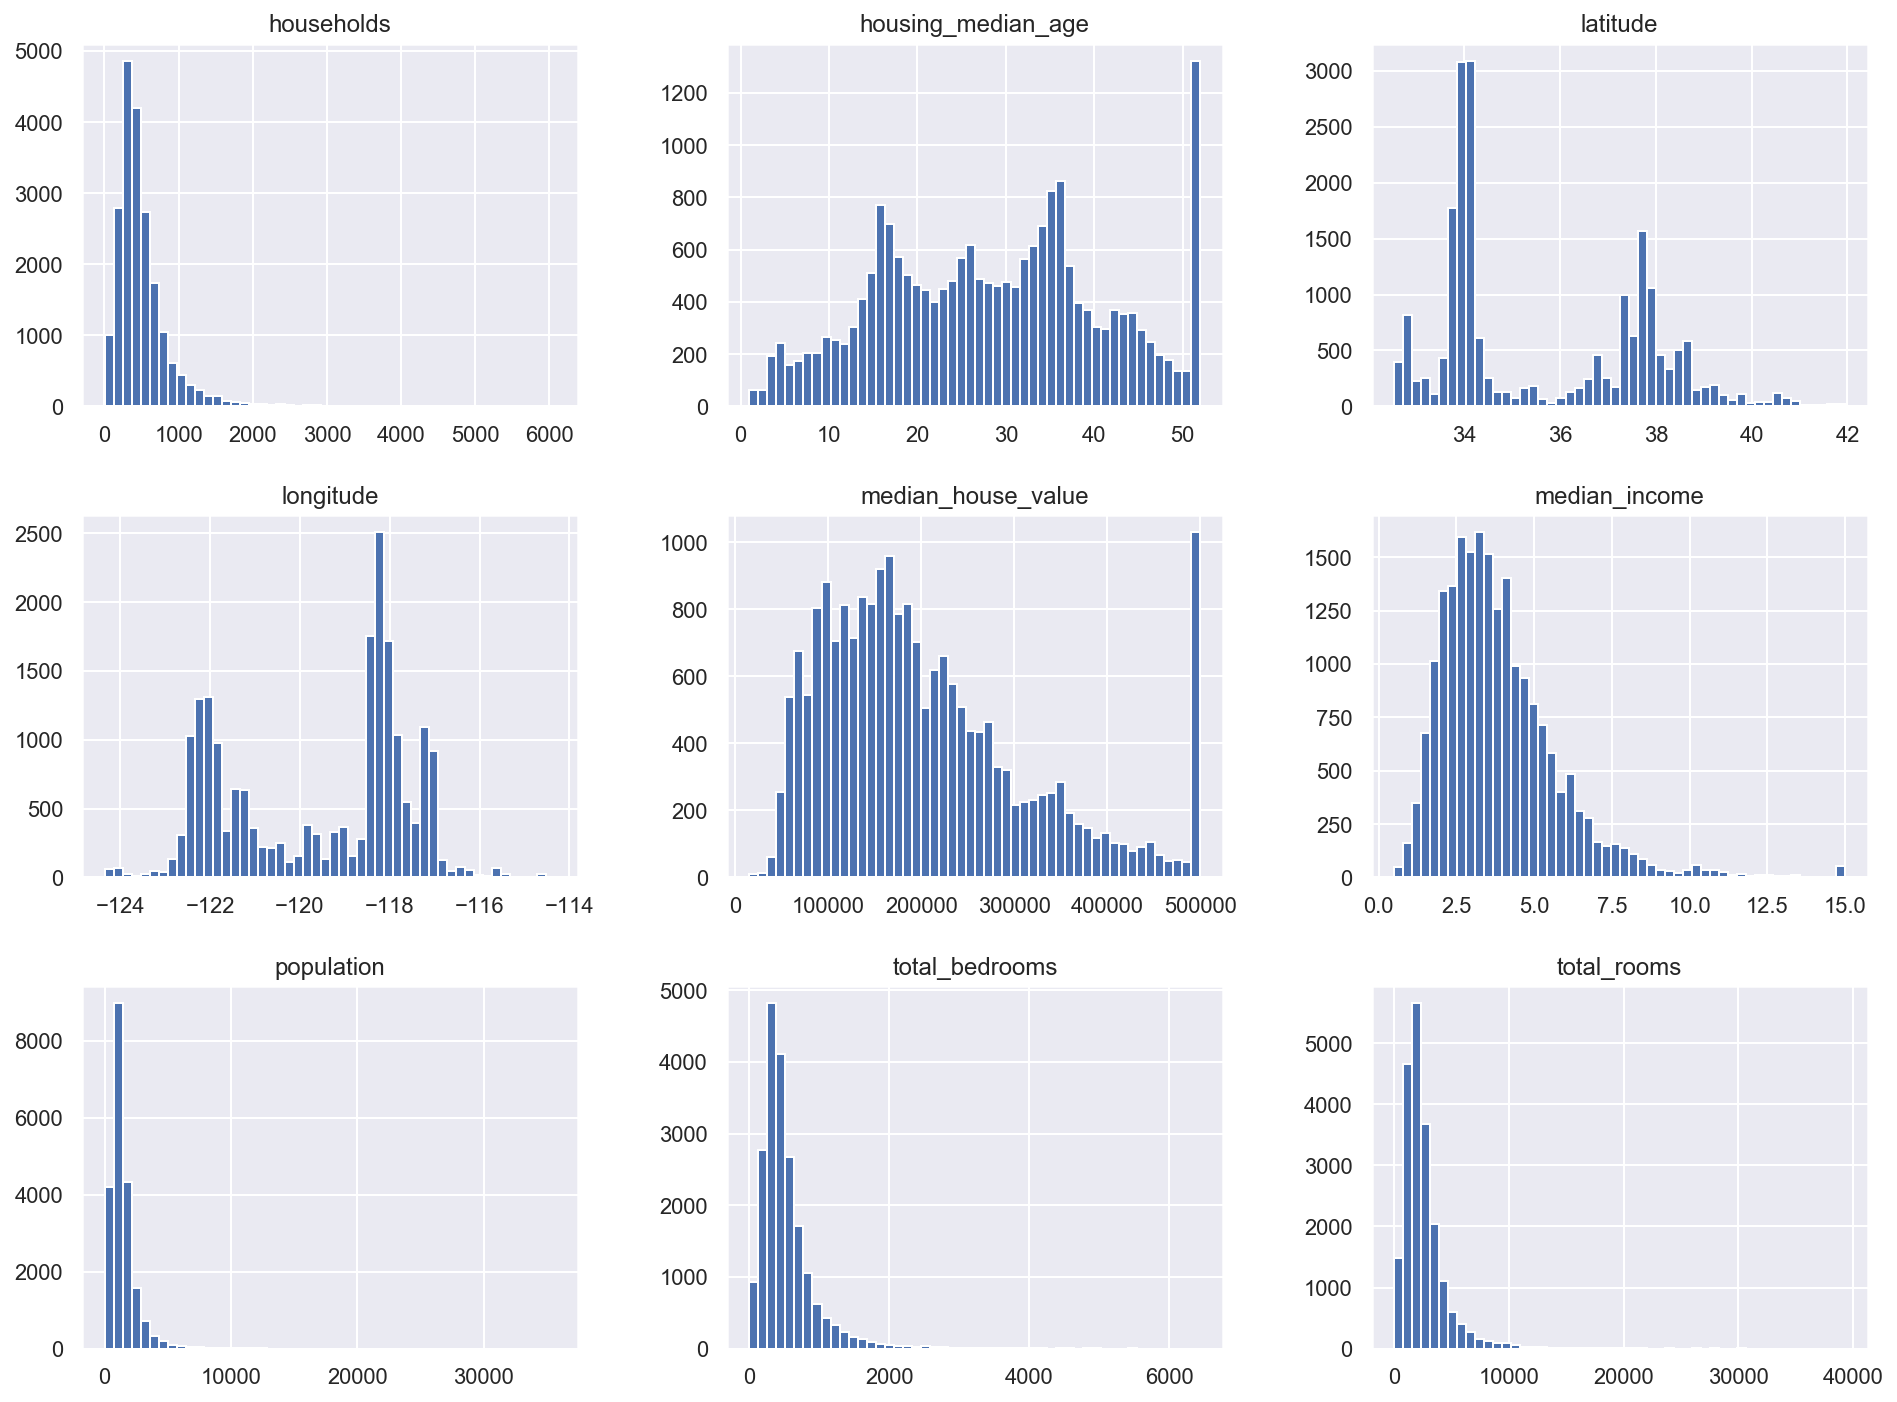

In [10]:
# Plot histograms for all numerical attributes
df_housing.hist(bins=50, figsize=(16,12))
plt.show()

In [35]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_housing, test_size=0.2)

print(f"Training dataset: {df_train.shape}")
print(f"Test dataset: {df_test.shape}")

Training dataset: (16512, 10)
Test dataset: (4128, 10)


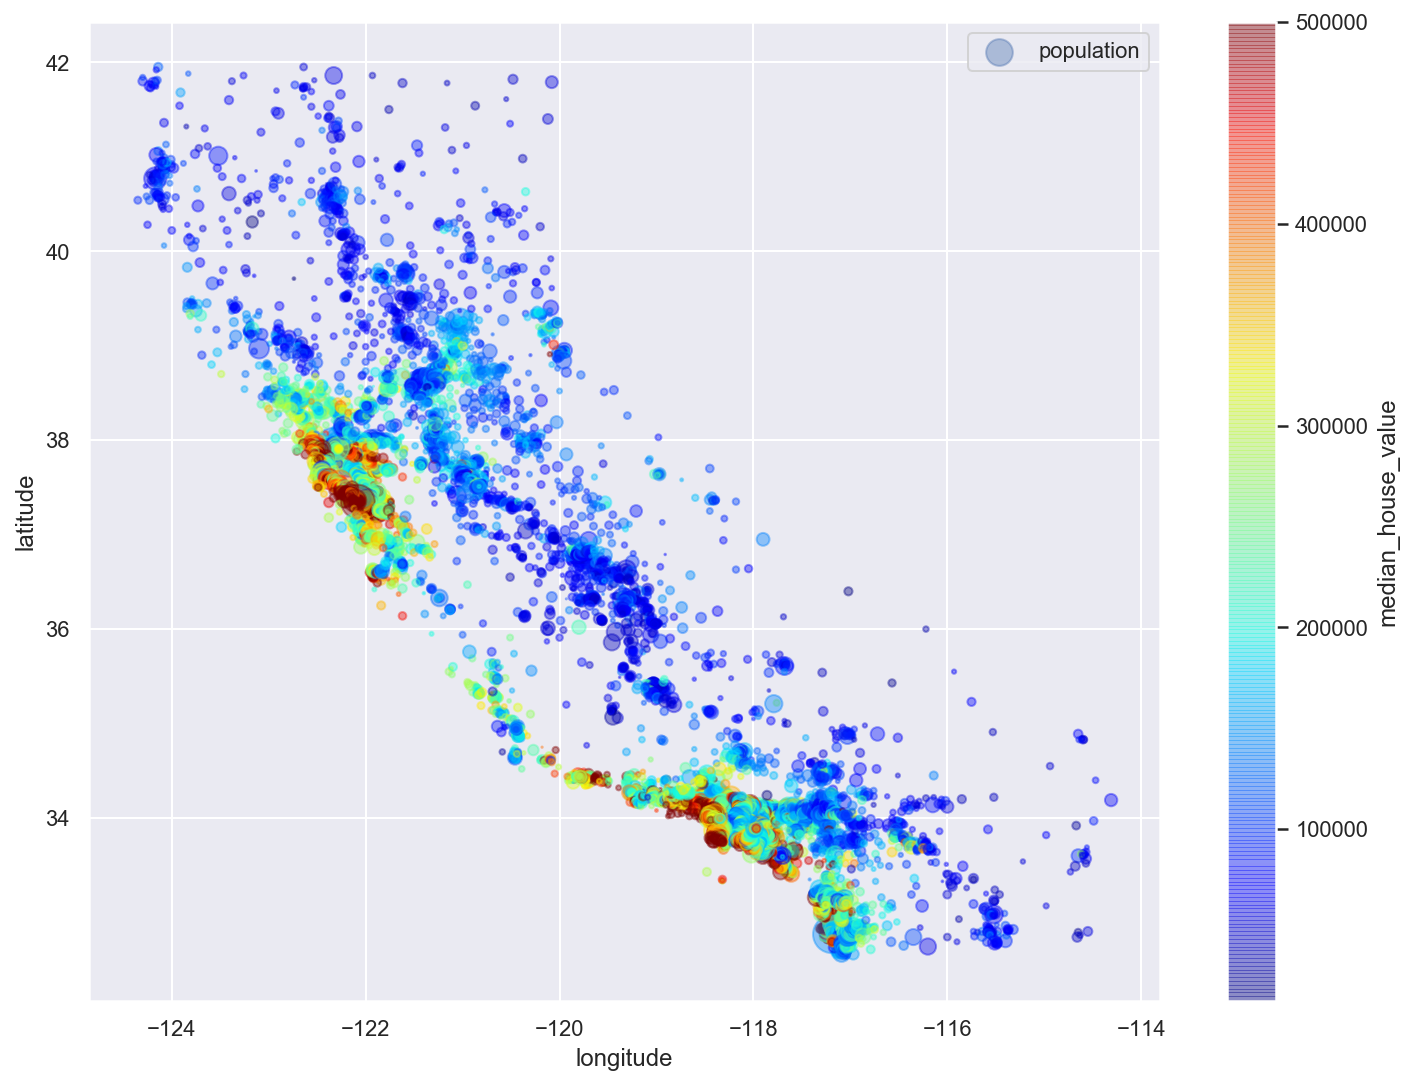

In [36]:
# Visualise prices relative to geographical coordinates
df_housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=df_train["population"]/100, label="population", figsize=(12,9),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
plt.show()

In [37]:
corr_matrix = df_train.corr()

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.693294
total_rooms           0.130985
housing_median_age    0.102080
households            0.061197
total_bedrooms        0.045597
population           -0.028403
longitude            -0.046452
latitude             -0.144820
Name: median_house_value, dtype: float64

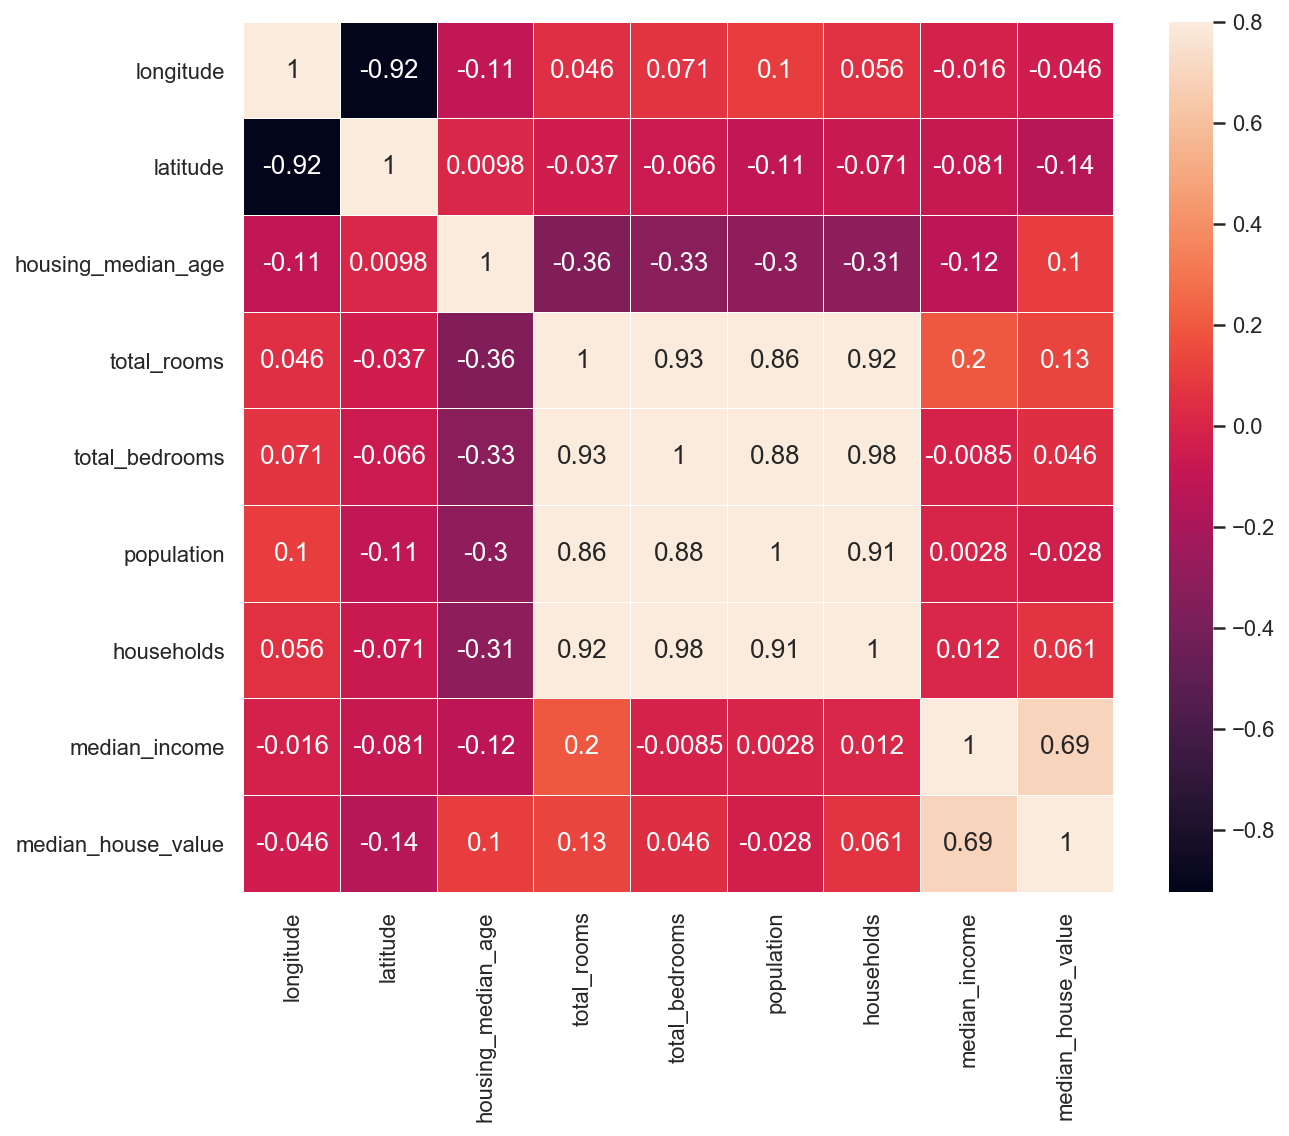

In [38]:
# Plot correlation matrix
def plot_correlation_matrix(df):
    # Select numerical columns
    df_numerical = df.select_dtypes(include=[np.number])
    
    f, ax = plt.subplots()
    ax = sns.heatmap(df.corr(), vmax=.8, linewidths=0.01,square=True,annot=True,
                linecolor="white",xticklabels = df_numerical.columns ,annot_kws = {'size':13},yticklabels = df_numerical.columns)
    # Correct a regression in matplotlib 3.1.1
    # https://stackoverflow.com/a/58165593
    # bottom, top = ax.get_ylim()
    # ax.set_ylim(bottom + 0.5, top - 0.5)

plot_correlation_matrix(df_train)

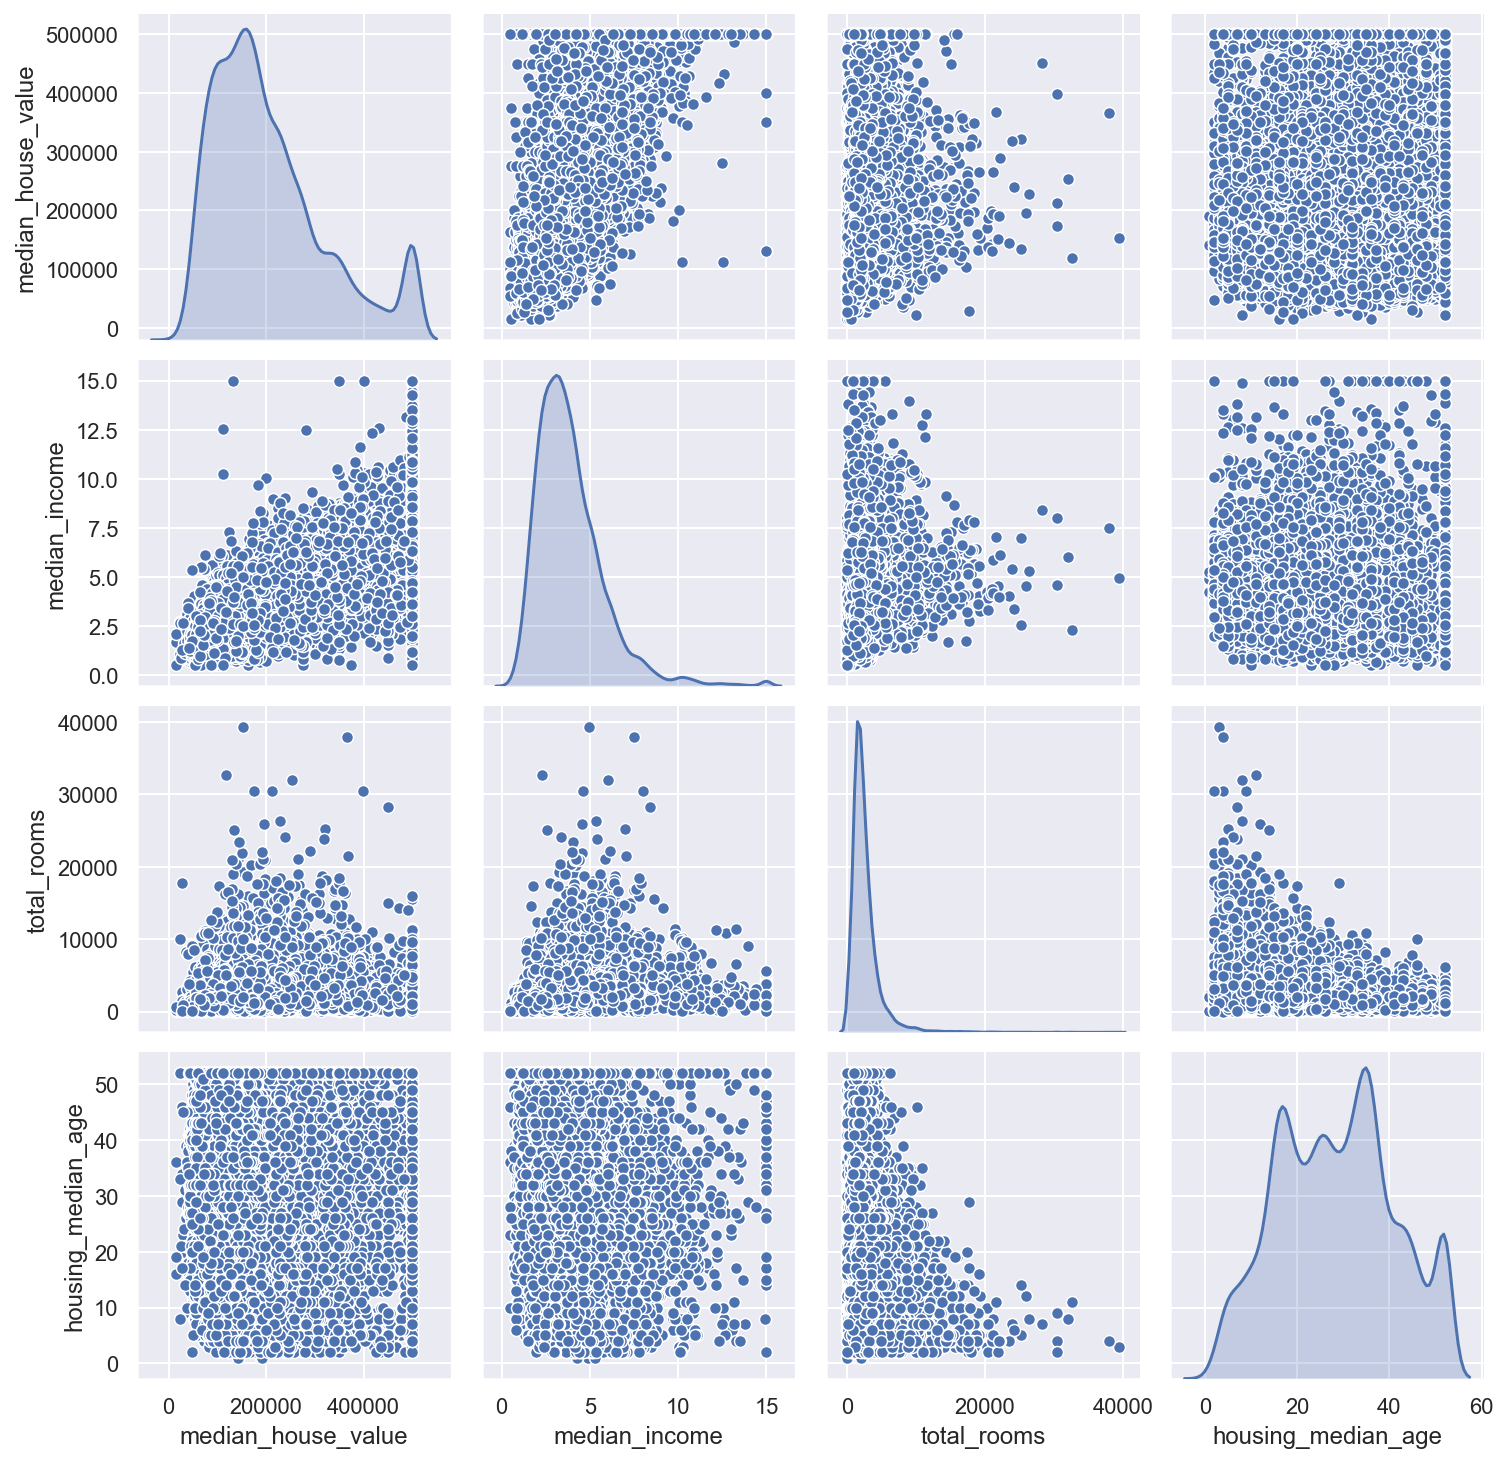

In [39]:
corr_attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
sns.pairplot(df_train[corr_attributes], diag_kind='kde')
plt.show()

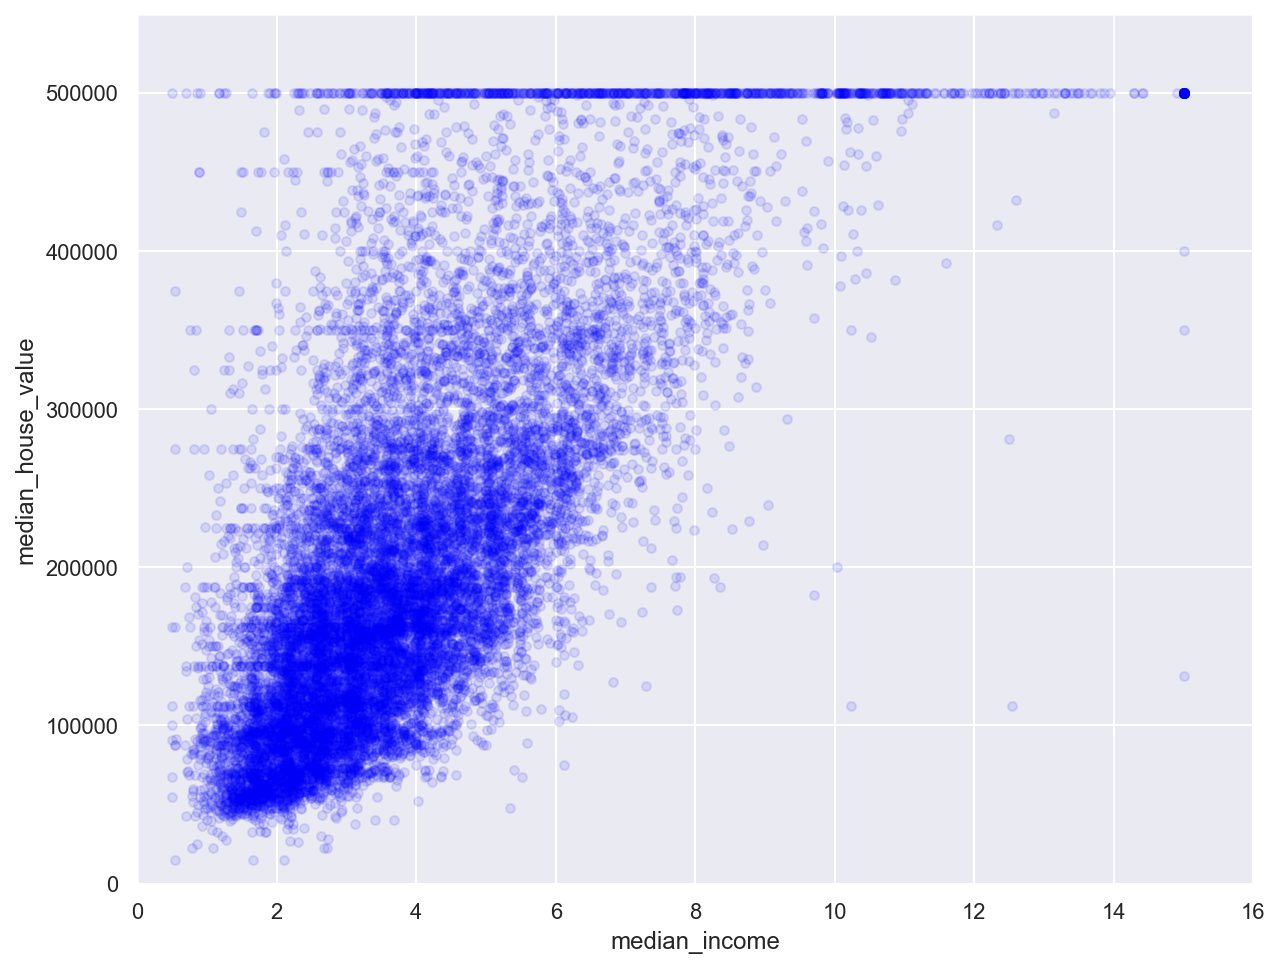

In [40]:
df_train.plot(kind="scatter", x="median_income", y="median_house_value",
    alpha=0.1, c='blue')
plt.axis([0, 16, 0, 550000])
plt.show()

In [41]:
df_housing_eng = df_train.copy()

df_housing_eng["rooms_per_household"] = df_housing_eng["total_rooms"]/df_housing_eng["households"]
df_housing_eng["bedrooms_per_room"] = df_housing_eng["total_bedrooms"]/df_housing_eng["total_rooms"]
df_housing_eng["population_per_household"]=df_housing_eng["population"]/df_housing_eng["households"]

df_housing_eng.drop(["total_rooms", "total_bedrooms", "population"], axis=1)

corr_matrix = df_housing_eng.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.693294
rooms_per_household         0.162710
total_rooms                 0.130985
housing_median_age          0.102080
households                  0.061197
total_bedrooms              0.045597
population                 -0.028403
longitude                  -0.046452
population_per_household   -0.053604
latitude                   -0.144820
bedrooms_per_room          -0.268044
Name: median_house_value, dtype: float64

In [78]:
df_x_train = df_train.drop("median_house_value", axis=1)
y_train = df_train["median_house_value"].to_numpy()

In [44]:
total = df_x_train.isnull().sum().sort_values(ascending=False)
percent = (df_x_train.isnull().sum() * 100 /df_x_train.isnull().count()).sort_values(ascending=False)
df_missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
df_missing_data.head()

,Total,Percent
total_bedrooms,168,1.017442
ocean_proximity,0,0.000000
median_income,0,0.000000
households,0,0.000000
population,0,0.000000


In [94]:
# Generate a random (3,3) tensor with values between 1 and 10
x = np.random.randint(1, 10, (3,3))
print(x)

[[4 2 6]
 [8 5 5]
 [1 3 3]]


In [95]:
scaler = StandardScaler().fit(x_train)
x_scaled = scaler.transform(x_train)
print(x_scaled)
print(f'Mean: {x_scaled.mean()}. Std: {x_scaled.std()}')

[[ 1.2563165  -1.18417649 -1.24014867 ... -0.01740407 -0.35022041
  -0.38120147]
 [-1.1039444   0.60790481 -1.55838531 ... -0.01740407 -0.35022041
  -0.38120147]
 [-0.40386701  2.1325813  -0.60367538 ... -0.01740407 -0.35022041
  -0.38120147]
 ...
 [-0.11383495  0.54691775 -0.20587957 ... -0.01740407 -0.35022041
  -0.38120147]
 [ 1.23631429 -1.27800274 -1.00147118 ... -0.01740407 -0.35022041
  -0.38120147]
 [ 0.57624132 -0.67751477  1.14662618 ... -0.01740407 -0.35022041
  -0.38120147]]
Mean: 2.7805227808143456e-18. Std: 1.0000000000000089


In [64]:
# Generate a random (8,1) matrix with values between 1 and 10
x = np.random.randint(0, 10, (8,1))
print(x)

[[1]
 [8]
 [2]
 [0]
 [5]
 [3]
 [9]
 [4]]


In [66]:
# Encoder input must be a matrix
# Output will be a sparse matrix where each column corresponds to one possible value of one feature
encoder = OneHotEncoder().fit(x)
x_hot = encoder.transform(x).toarray()

print(x_hot)
print(encoder.categories_)

[[0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]]
[array([0, 1, 2, 3, 4, 5, 8, 9])]


In [67]:
num_features = df_x_train.select_dtypes(include=[np.number]).columns
print(num_features)

cat_features = df_x_train.select_dtypes(include=[np.object]).columns
print(cat_features)

# Print all values for the "ocean_proximity" attribute
df_x_train["ocean_proximity"].value_counts()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')
Index(['ocean_proximity'], dtype='object')


<1H OCEAN     7358
INLAND        5250
NEAR OCEAN    2095
NEAR BAY      1804
ISLAND           5
Name: ocean_proximity, dtype: int64

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_features),
        ("cat", OneHotEncoder(), cat_features),
    ])

x_train = full_pipeline.fit_transform(df_x_train)

# "ocean_proximity" attribute has 5 different values
# To represent them, one-hot encoding has added 4 features to the dataset
print(f"x_train: {x_train.shape}")
print(x_train[0])

x_train: (16512, 13)
[ 1.2563165  -1.18417649 -1.24014867  1.30327301  0.49545994  0.60373497
  0.42478162  1.19785988  1.          0.          0.          0.
  0.        ]


In [79]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
from sklearn.metrics import mean_squared_error

y_pred = lin_model.predict(x_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print(f"Training RMSE: {rmse}")

Training RMSE: 68819.04014135228


In [92]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [93]:
y_pred = dt_model.predict(x_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print(f"Training RMSE: {rmse}")

Training RMSE: 0.0
